## TASK:

In this assignment students need to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost. The description of the dataset is as follows:

#### Data Set Information:
    
Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Attribute Information:

Listing of attributes: >50K, <=50K.

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,
    Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school,
Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th,

Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married,
Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-
managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct,

Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv,
Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative,
Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.
    
native-country: United-States, Cambodia, England, Puerto-Rico,
Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,
Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy,
Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,

Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-
Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Following is the code to load required libraries and data:
    



NOTE:ThesolutionsharedthroughGithubshouldcontainthesource
codeusedand thescreenshotoftheoutput.

3.Output
This assignment consists of 200

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import XGBoostClassifier


In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

In [3]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

In [4]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class']

train_set.columns = col_labels
test_set.columns = col_labels

In [24]:
train_set['capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital_gain, Length: 119, dtype: int64

In [25]:
train_set['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

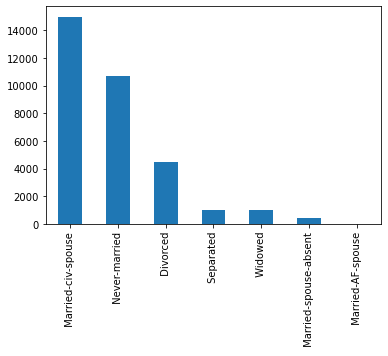

In [33]:
train_set['marital_status'].value_counts().plot(kind='bar')

In [26]:
train_set['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

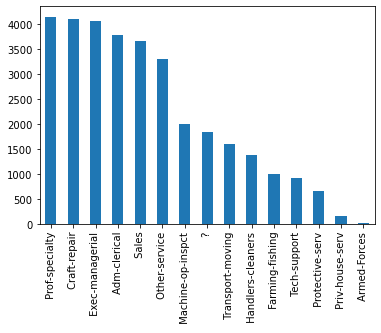

In [32]:
train_set['occupation'].value_counts().plot(kind='bar')

In [27]:
train_set['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

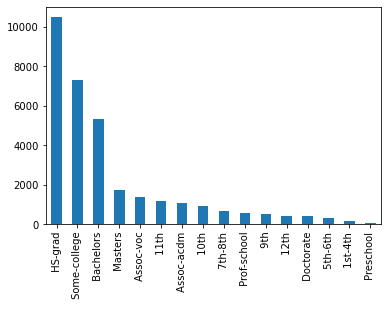

In [31]:
train_set['education'].value_counts().plot(kind='bar')

In [28]:
train_set['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

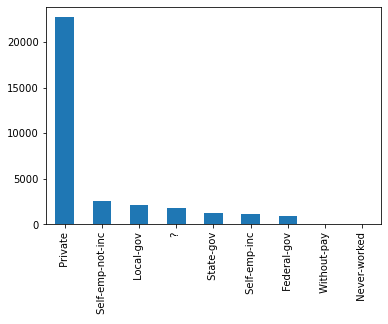

In [30]:
train_set['workclass'].value_counts().plot(kind='bar')

In [29]:
train_set['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

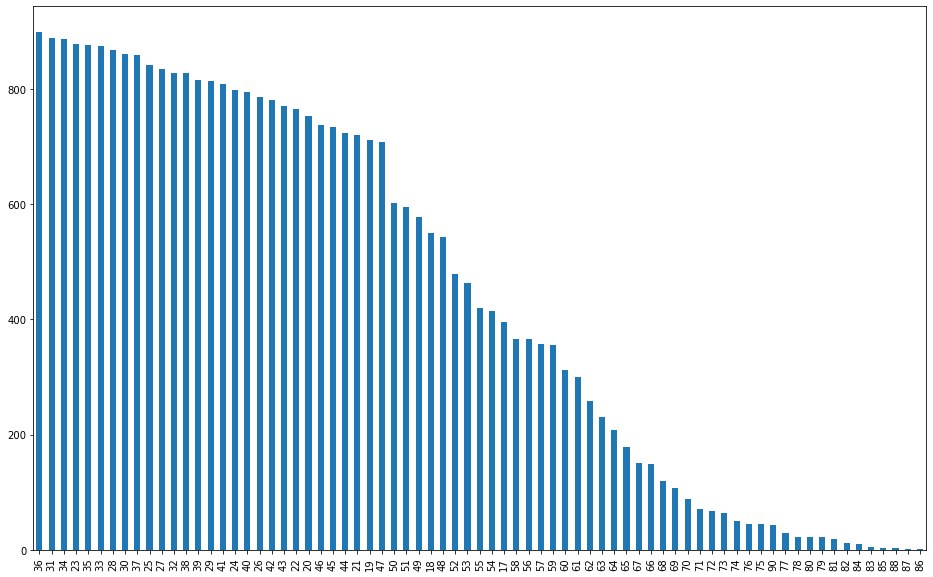

In [36]:
plt.figure(figsize=(16,10))
train_set['age'].value_counts().plot(kind='bar')

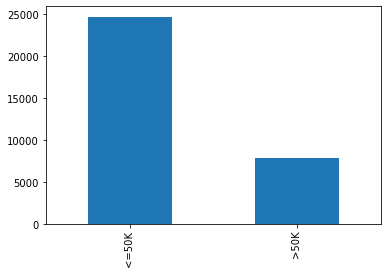

In [37]:
train_set['wage_class'].value_counts().plot(kind='bar')

In [38]:
train_set['wage_class'].value_counts()

 <=50K    24720
 >50K      7841
Name: wage_class, dtype: int64

In [39]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [40]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [41]:
train_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


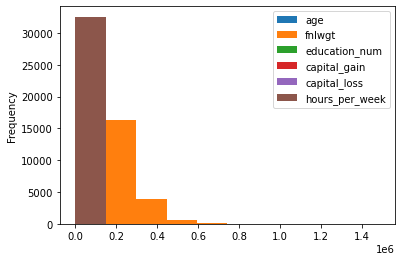

In [42]:
train_set.plot(kind='hist')

In [44]:
num_feat = [feat for feat in train_set.columns if train_set[feat].dtype!='object']

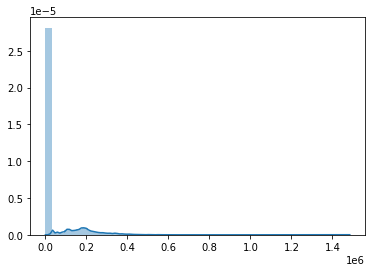

In [45]:
sns.distplot(train_set[num_feat])

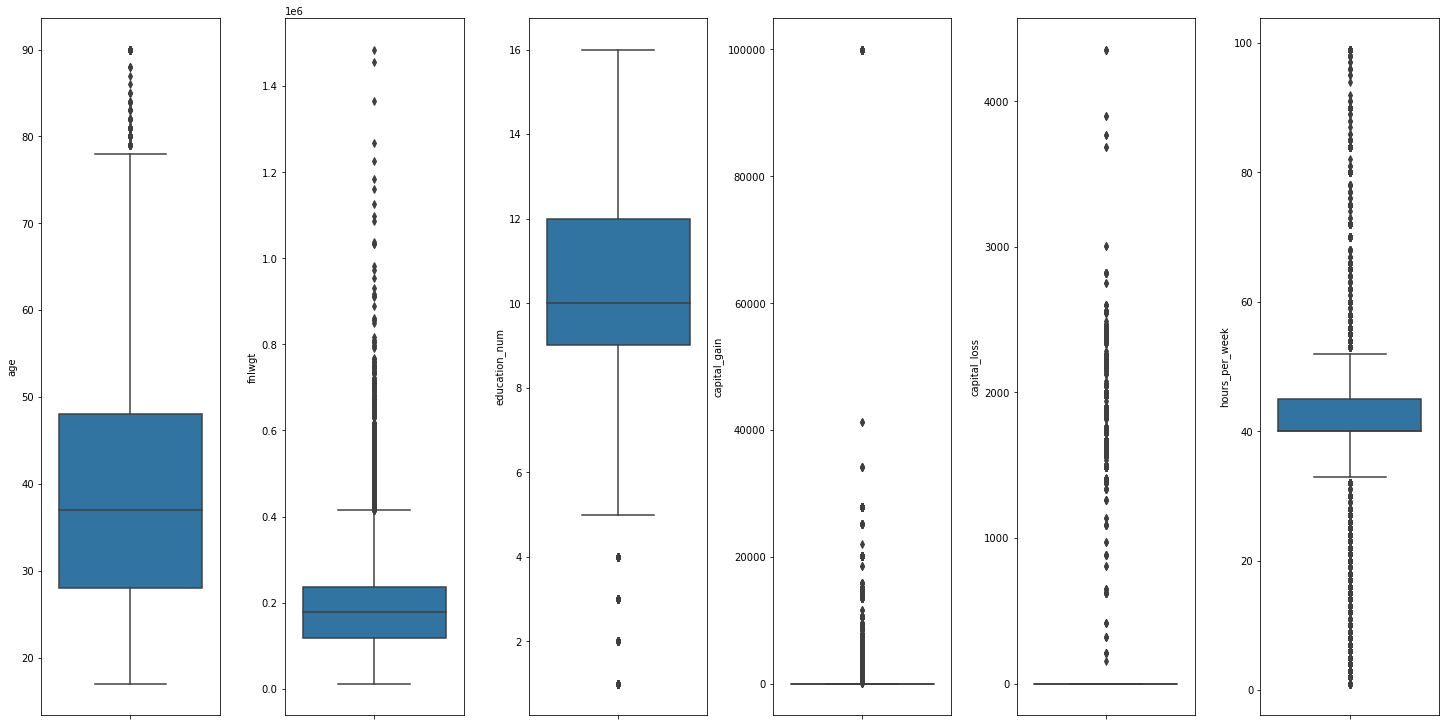

In [71]:
from scipy import stats

fig, axs = plt.subplots(ncols=6, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in train_set[num_feat].items():
    sns.boxplot(y=k, data=train_set[num_feat], ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

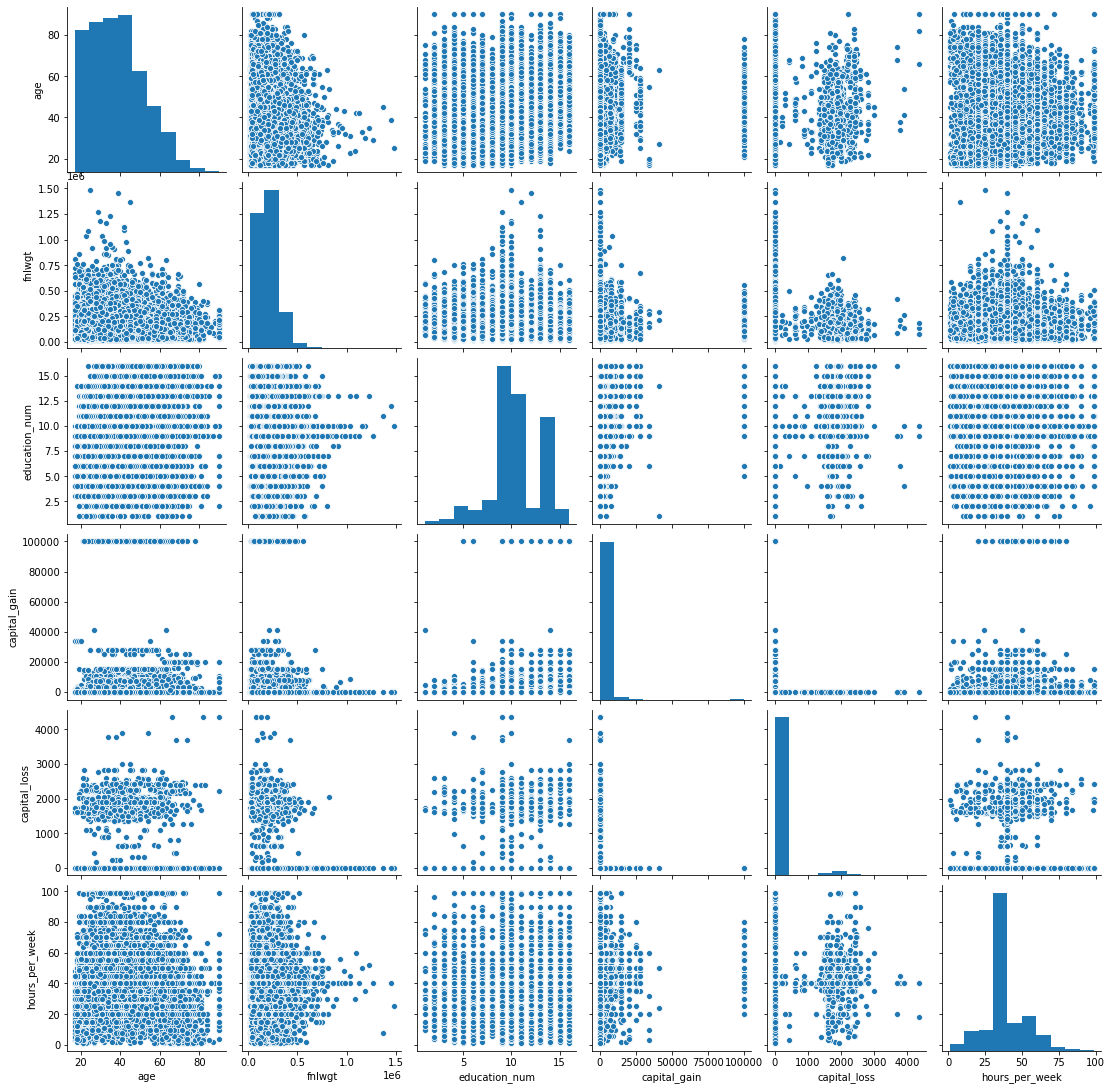

In [73]:
sns.pairplot(train_set)

In [74]:
num_feat

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [80]:
train_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

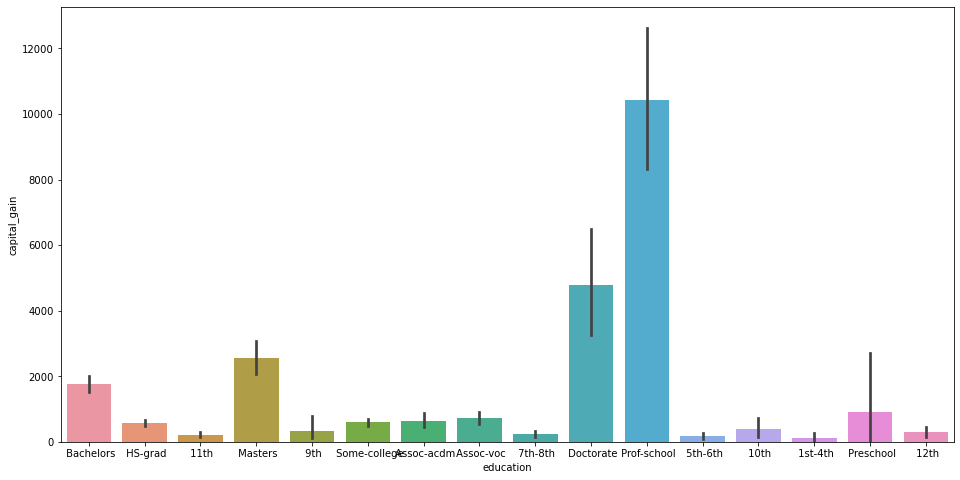

In [79]:
plt.figure(figsize=(16,8))
sns.barplot(train_set['education'], train_set['capital_gain'])

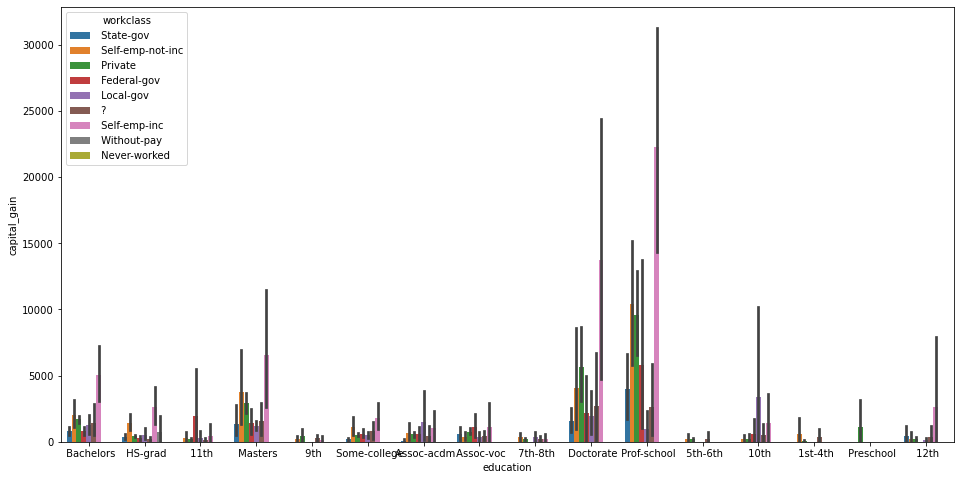

In [81]:
plt.figure(figsize=(16,8))
sns.barplot(train_set['education'], train_set['capital_gain'], hue=train_set['workclass'])

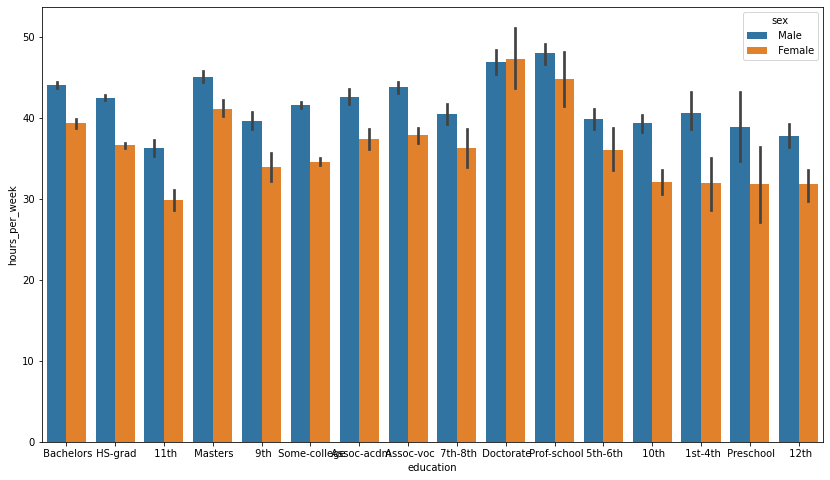

In [84]:
plt.figure(figsize=(14,8))
sns.barplot(train_set['education'], train_set['hours_per_week'],hue=train_set['sex'])

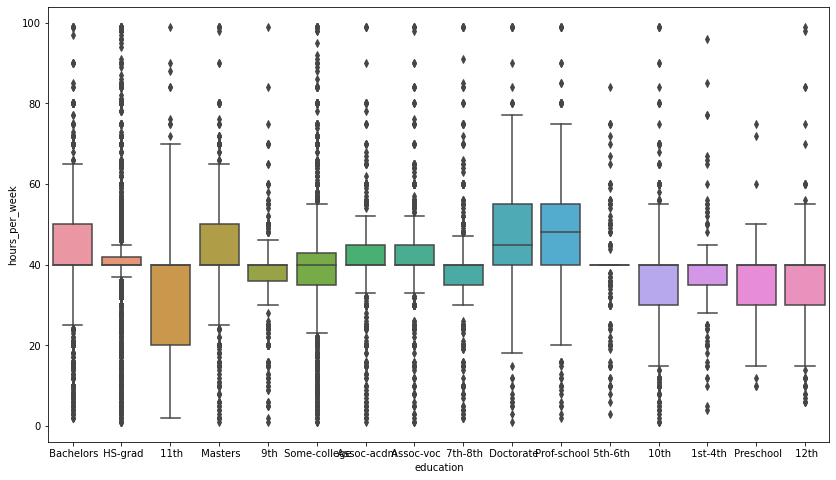

In [82]:
plt.figure(figsize=(14,8))
sns.boxplot(train_set['education'], train_set['hours_per_week'])

/home/kavish/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/kavish/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


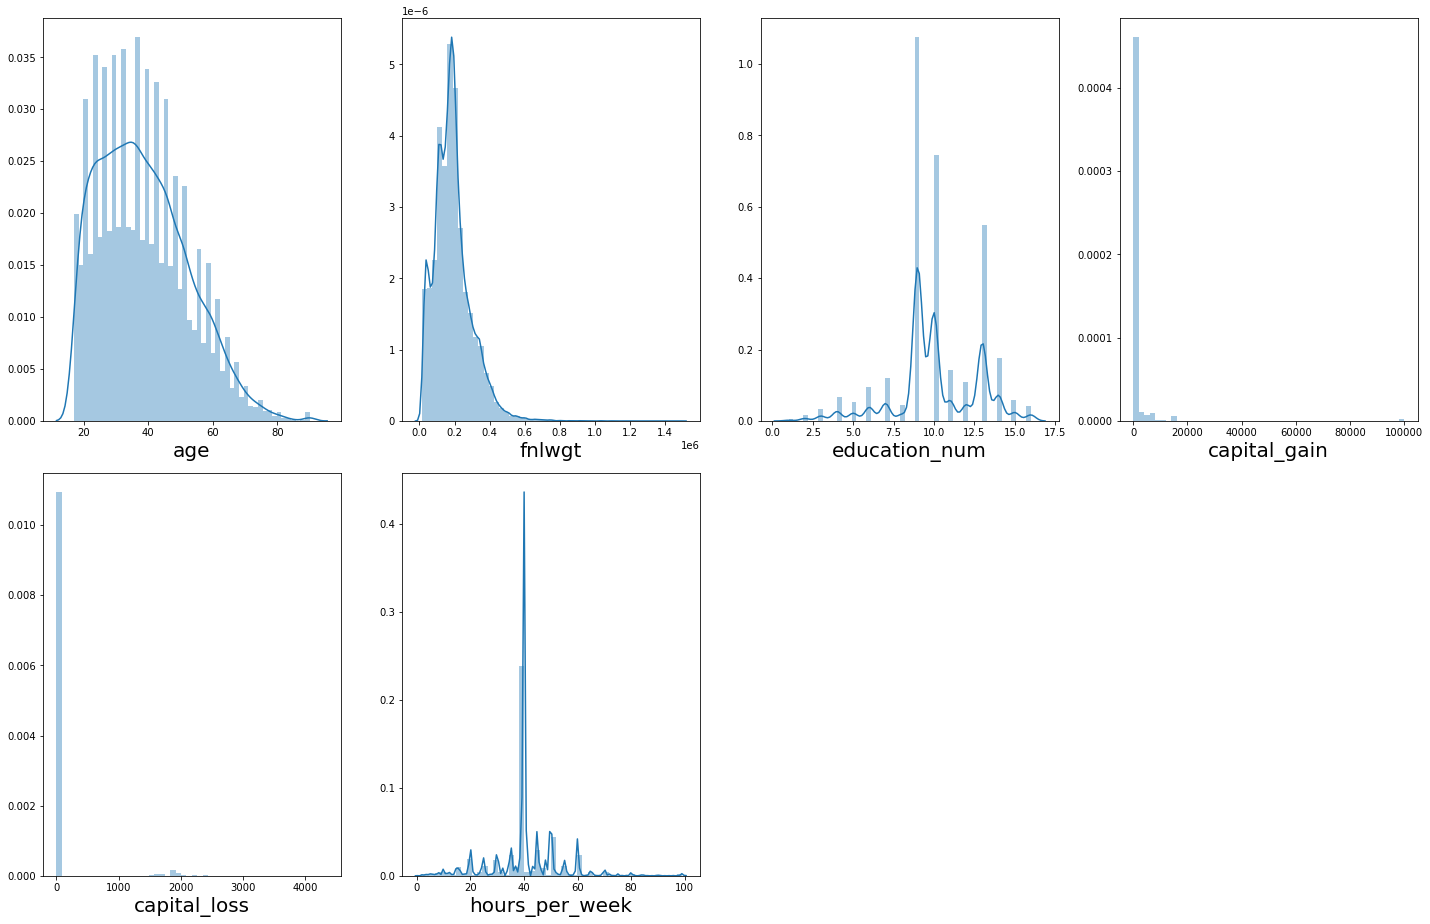

In [90]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in train_set[num_feat]:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(train_set[num_feat][column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('dist',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [91]:
train_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [100]:
len(train_set.native_country.value_counts())

42

In [17]:
from patsy import dmatrices
y, X = dmatrices('wage_class ~ age + C(workclass) +fnlwgt + C(education) + education_num + C(marital_status) +C(occupation) + C(relationship) + C(relationship) + C(race) + C(sex) + capital_gain + capital_loss + hours_per_week ',train_set, return_type="dataframe")

In [18]:
X.head()

,Intercept,C(workclass)[T. Federal-gov],C(workclass)[T. Local-gov],C(workclass)[T. Never-worked],C(workclass)[T. Private],C(workclass)[T. Self-emp-inc],C(workclass)[T. Self-emp-not-inc],C(workclass)[T. State-gov],C(workclass)[T. Without-pay],C(education)[T. 11th],...,C(race)[T. Black],C(race)[T. Other],C(race)[T. White],C(sex)[T. Male],age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,39.0,77516.0,13.0,2174.0,0.0,40.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,50.0,83311.0,13.0,0.0,0.0,13.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,38.0,215646.0,9.0,0.0,0.0,40.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,53.0,234721.0,7.0,0.0,0.0,40.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,28.0,338409.0,13.0,0.0,0.0,40.0


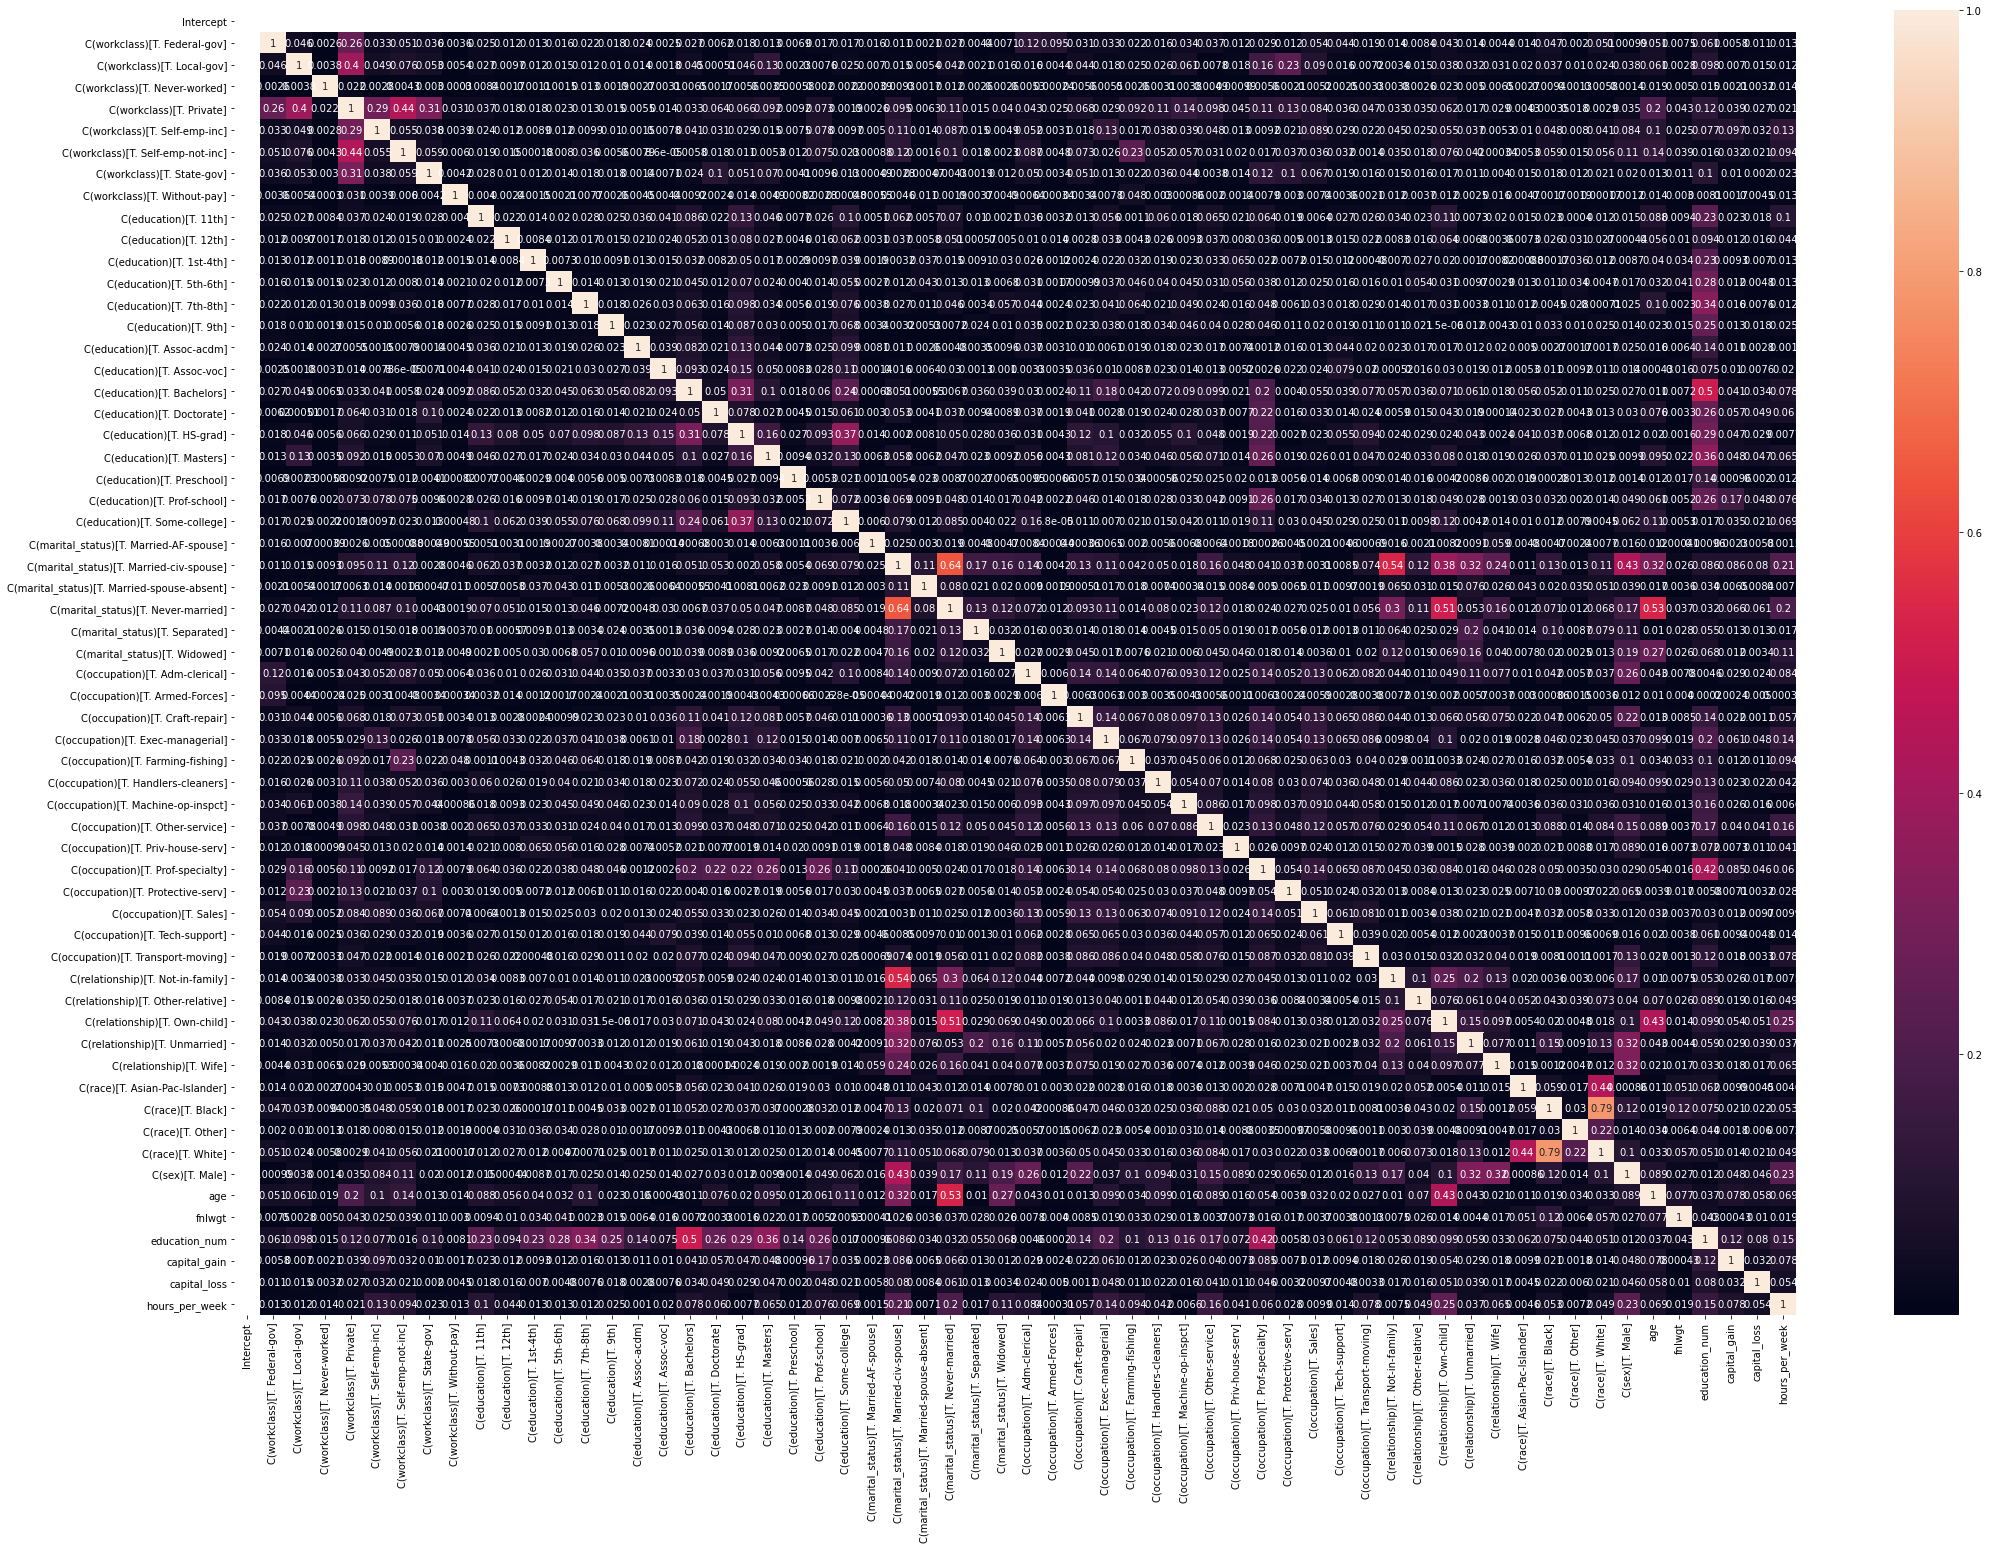

In [146]:
plt.figure(figsize=(36,24))
sns.heatmap(X.corr().abs(), annot = True)

## Traning the Model

In [19]:
import xgboost as xgb

In [20]:
classifier = xgb.XGBClassifier()

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
lbe = LabelEncoder()
target = lbe.fit_transform(train_set['wage_class'])

In [23]:
target

array([0, 0, 0, ..., 0, 0, 1])

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [136]:
X_df = pd.DataFrame(X_scaled)

/home/kavish/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/kavish/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/kavish/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/kavish/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/kavish/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/kavish/anaconda3/lib/python3.8/site-packages

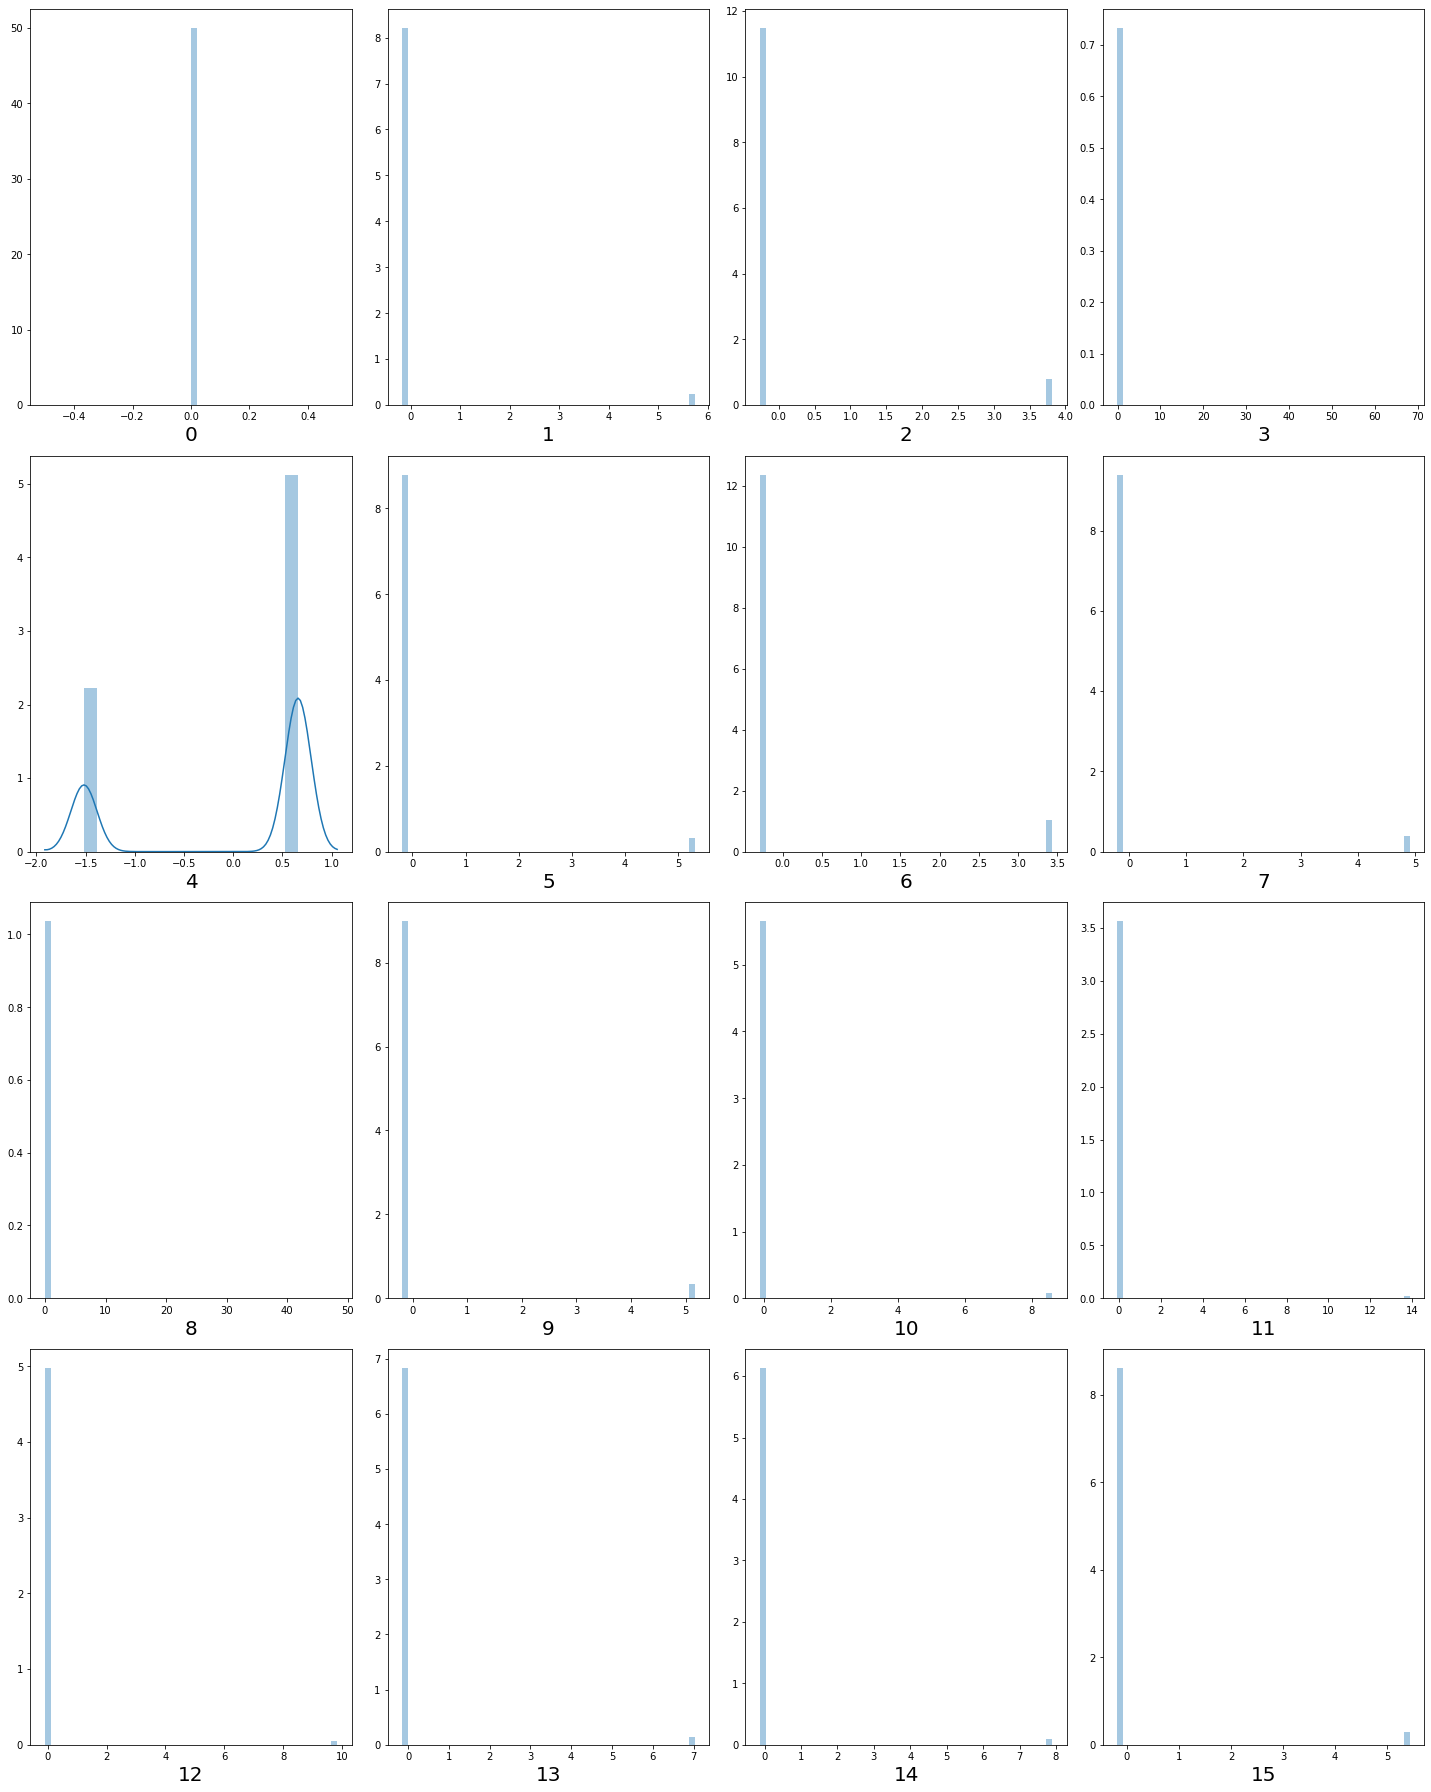

In [137]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X_df:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(X_df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('dist',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2)

In [132]:
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [133]:
pred = classifier.predict(X_test)

In [134]:
from sklearn.metrics import classification_report
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      5152
           1       0.66      0.78      0.72      1361

    accuracy                           0.87      6513
   macro avg       0.80      0.84      0.82      6513
weighted avg       0.88      0.87      0.87      6513



Not bad! We are getting preety good accuracy score of .87 and f1-score for '<50K' is 0.92 and for '>50K' is 0.72.

## Reverse Engineering

[0.2426046  0.02161149 0.00996206 0.02060532 0.0564711  0.01513738
 0.01153911 0.01117441 0.00997914 0.01135019 0.01100896 0.0183132
 0.00899444 0.01236017 0.01029074 0.01239296 0.01249625 0.01070398
 0.00923643 0.01118266 0.00970856 0.01305936 0.01137823 0.0101349
 0.01097454 0.0114643  0.00902718 0.01100294 0.01622867 0.01042382
 0.01318749 0.00940856 0.00857311 0.00973672 0.01055017 0.00972943
 0.01006061 0.00973377 0.01376614 0.01022752 0.01676859 0.01808776
 0.01102317 0.01534551 0.01273923 0.01177584 0.01331504 0.00989107
 0.01467701 0.01066534 0.01391448 0.01491532 0.01078438 0.01128498
 0.0145437  0.00950707 0.01421034 0.01199101 0.00817838 0.01059122]


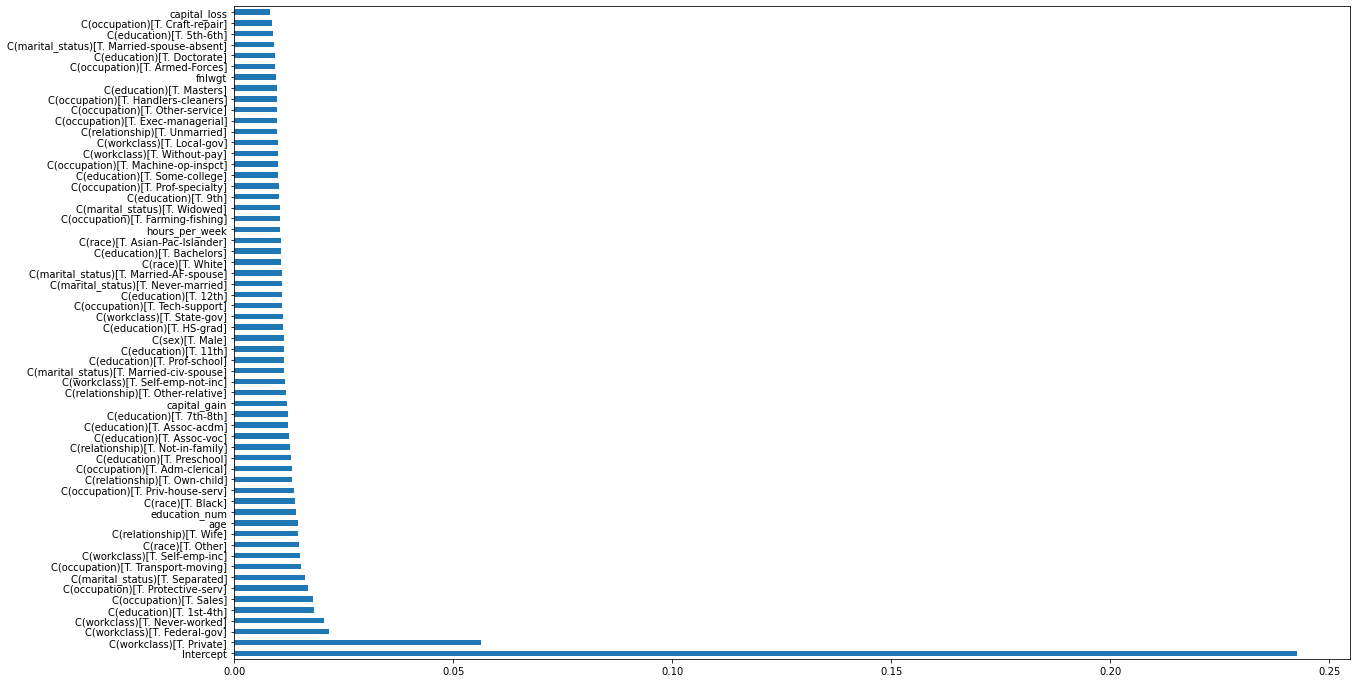

In [114]:
print(classifier.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).plot(kind='barh', figsize=(20,12))
plt.show()

In [116]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


kf = KFold(n_splits=10)
scores = cross_val_score(classifier, X_scaled, target, cv=kf)
##print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


In [117]:
print("Accuracy: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))

Accuracy: 86.97% (0.51%)


In [122]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=10, random_state=7)
results = cross_val_score(classifier, X_scaled, target, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 87.09% (0.39%)


In [133]:
from sklearn.model_selection import GridSearchCV

In [134]:
param_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [136]:
grid= GridSearchCV(xgb.XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)

In [139]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[15:28:13] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.848, total=   0.8s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[15:28:13] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.855, total=   0.5s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[15:28:14] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.854, total=   0.5s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[15:28:14] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.860, total=   0.4s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[15:28:14] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_

[CV]   learning_rate=1, max_depth=3, n_estimators=200, score=0.872, total=   7.0s
[CV]  learning_rate=1, max_depth=5, n_estimators=10 ..................
[15:29:17] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=5, n_estimators=10, score=0.852, total=   0.7s
[CV]  learning_rate=1, max_depth=5, n_estimators=10 ..................
[15:29:18] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max

[CV]   learning_rate=1, max_depth=5, n_estimators=200, score=0.867, total=  10.4s
[CV]  learning_rate=1, max_depth=5, n_estimators=200 .................
[15:30:22] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=5, n_estimators=200, score=0.863, total=  10.6s
[CV]  learning_rate=1, max_depth=5, n_estimators=200 .................
[15:30:33] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, ma

[CV]   learning_rate=1, max_depth=10, n_estimators=100, score=0.863, total=  10.8s
[CV]  learning_rate=1, max_depth=10, n_estimators=100 ................
[15:32:14] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=10, n_estimators=100, score=0.865, total=  10.7s
[CV]  learning_rate=1, max_depth=10, n_estimators=200 ................
[15:32:25] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, 

[CV]   learning_rate=1, max_depth=20, n_estimators=100, score=0.855, total=  23.9s
[CV]  learning_rate=1, max_depth=20, n_estimators=100 ................
[15:35:57] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=20, n_estimators=100, score=0.856, total=  24.6s
[CV]  learning_rate=1, max_depth=20, n_estimators=100 ................
[15:36:21] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, 

[CV]   learning_rate=0.5, max_depth=3, n_estimators=50, score=0.865, total=   1.7s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50 ................
[15:41:38] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=3, n_estimators=50, score=0.868, total=   1.7s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50 ................
[15:41:40] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5

[CV]   learning_rate=0.5, max_depth=5, n_estimators=10, score=0.859, total=   0.6s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50 ................
[15:42:35] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=5, n_estimators=50, score=0.871, total=   2.6s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50 ................
[15:42:38] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5

[CV]   learning_rate=0.5, max_depth=10, n_estimators=10, score=0.867, total=   1.2s
[CV]  learning_rate=0.5, max_depth=10, n_estimators=10 ...............
[15:44:08] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=10, n_estimators=10, score=0.864, total=   1.3s
[CV]  learning_rate=0.5, max_depth=10, n_estimators=10 ...............
[15:44:09] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0

[CV]   learning_rate=0.5, max_depth=10, n_estimators=200, score=0.860, total=  20.7s
[CV]  learning_rate=0.5, max_depth=10, n_estimators=200 ..............
[15:46:55] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=10, n_estimators=200, score=0.863, total=  21.0s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=10 ...............
[15:47:16] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate

[CV]   learning_rate=0.5, max_depth=20, n_estimators=200, score=0.856, total=  48.1s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=200 ..............
[15:51:23] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=20, n_estimators=200, score=0.854, total=  48.2s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=200 ..............
[15:52:12] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate

[CV]   learning_rate=0.1, max_depth=3, n_estimators=100, score=0.869, total=   3.4s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100 ...............
[15:54:55] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=3, n_estimators=100, score=0.873, total=   3.5s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100 ...............
[15:54:59] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0

[CV]   learning_rate=0.1, max_depth=5, n_estimators=50, score=0.872, total=   3.0s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=100 ...............
[15:55:54] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=5, n_estimators=100, score=0.869, total=   5.8s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=100 ...............
[15:56:00] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.

[CV]   learning_rate=0.1, max_depth=10, n_estimators=50, score=0.868, total=   6.1s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50 ...............
[15:57:45] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=10, n_estimators=50, score=0.864, total=   6.3s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50 ...............
[15:57:52] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0

[CV]   learning_rate=0.1, max_depth=20, n_estimators=10, score=0.859, total=   2.7s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=10 ...............
[16:00:59] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=20, n_estimators=10, score=0.856, total=   2.7s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=50 ...............
[16:01:02] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0

[CV]   learning_rate=0.01, max_depth=3, n_estimators=10, score=0.848, total=   0.4s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=10 ...............
[16:08:51] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=3, n_estimators=10, score=0.855, total=   0.4s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=10 ...............
[16:08:51] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0

[CV]   learning_rate=0.01, max_depth=3, n_estimators=200, score=0.869, total=   6.6s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=200 ..............
[16:09:37] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=3, n_estimators=200, score=0.872, total=   6.8s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=200 ..............
[16:09:44] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate

[CV]   learning_rate=0.01, max_depth=5, n_estimators=100, score=0.869, total=   5.4s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200 ..............
[16:10:36] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=5, n_estimators=200, score=0.866, total=  10.5s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200 ..............
[16:10:47] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate

[CV]   learning_rate=0.01, max_depth=10, n_estimators=100, score=0.862, total=  10.3s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=100 .............
[16:12:20] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=10, n_estimators=100, score=0.858, total=  10.4s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=100 .............
[16:12:31] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_ra

[CV]   learning_rate=0.01, max_depth=20, n_estimators=50, score=0.858, total=  12.1s
[CV]  learning_rate=0.01, max_depth=20, n_estimators=50 ..............
[16:15:36] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=20, n_estimators=50, score=0.859, total=  12.3s
[CV]  learning_rate=0.01, max_depth=20, n_estimators=100 .............
[16:15:48] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate

[CV]   learning_rate=0.001, max_depth=3, n_estimators=50, score=0.867, total=   1.7s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=50 ..............
[16:21:43] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=3, n_estimators=50, score=0.869, total=   1.7s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=50 ..............
[16:21:44] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate

[CV]   learning_rate=0.001, max_depth=5, n_estimators=10, score=0.856, total=   0.6s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=10 ..............
[16:22:40] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=5, n_estimators=10, score=0.864, total=   0.6s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=10 ..............
[16:22:40] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate

[CV]   learning_rate=0.001, max_depth=5, n_estimators=200, score=0.867, total=   9.9s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=10 .............
[16:24:09] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=10, n_estimators=10, score=0.864, total=   1.2s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=10 .............
[16:24:10] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_ra

[CV]   learning_rate=0.001, max_depth=10, n_estimators=200, score=0.860, total=  20.2s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=200 ............
[16:26:14] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=10, n_estimators=200, score=0.850, total=  20.2s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=200 ............
[16:26:34] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_

[CV]   learning_rate=0.001, max_depth=20, n_estimators=100, score=0.853, total=  23.5s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=100 ............
[16:30:03] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=20, n_estimators=100, score=0.853, total=  24.1s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=200 ............
[16:30:27] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed: 66.1min finished


[16:34:21] WARNING: ../src/learner.cc:516: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [140]:
# To find the parameters giving maximum accuracy
grid.best_params_

{' learning_rate': 1, 'max_depth': 3, 'n_estimators': 200}

In [141]:
# Create new model using the same parameters
new_model=xgb.XGBClassifier(learning_rate= 1, max_depth= 3, n_estimators= 200)
new_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [142]:
from sklearn.metrics import accuracy_score
y_pred_new = new_model.predict(X_test)
predictions_new = [round(value) for value in y_pred_new]
accuracy_new = accuracy_score(y_test,predictions_new)
accuracy_new

0.8676493167511131

In [143]:
print(classification_report(predictions_new, y_test))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      5118
           1       0.67      0.75      0.71      1395

    accuracy                           0.87      6513
   macro avg       0.80      0.83      0.81      6513
weighted avg       0.87      0.87      0.87      6513



In [106]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, pca, KernelPCA
reducer = PCA()
X_pca = reducer.fit_transform(X_scaled)


In [128]:
x_train, x_test, y_train, y_test = train_test_split(X_pca, target, test_size=0.33)

In [129]:
classifier = xgb.XGBClassifier()

In [130]:
classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [131]:
new_pred = classifier.predict(x_test)

In [132]:
from sklearn.metrics import classification_report
print(classification_report(new_pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90      8559
           1       0.59      0.69      0.64      2187

    accuracy                           0.84     10746
   macro avg       0.75      0.78      0.77     10746
weighted avg       0.85      0.84      0.84     10746



As we can see here we have got the maximum accuracy score of 0.87 so far. Even after applying dimensionality reduction and tunning hyperparameters using gridsearchcv, not able to increase it from 0.87. So just leaving it here for now.

## Thanks!

In [144]:
## For installing required packages in one line via terminal 
## pip freeze > requirements.txt
## pip list
# pip install -r requirements.txt